In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h3_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

# case 컬럼을 범주형으로 정렬
case_order = [0, 1, 2, 3]
df['case'] = pd.Categorical(df['case'], categories=case_order, ordered=True)

In [2]:
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.max_rows', None)  # 모든 행 표시

# 데이터프레임 출력
df

,trial,work,hot_compaction,cold_compaction,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,case
0,3,write,level,level,230.716,193887,250603,803700692,4848802592,16407311441,1806113,7282524160,5463709,7050007,3777,1802336,0,0,0,73143524,2.564519,11.392981,20.112287,804.0,1806113,8608731,4.766441,8.575411,14.380769,29.787064,4538617.0,1000000,229110925,229.110925,0.344511,4.063338,0.436618,0.002091,7.111475e+07,0
1,3,write,universal,level,268.855,193868,250184,803834193,3751794273,16407310871,1806132,7275347968,7655390,5699702,3780,1802352,0,0,0,56259276,3.065318,15.920499,29.454693,808.0,1806132,10323691,5.715912,8.463245,14.143125,26.525009,4163063.0,1000000,267328410,267.328410,0.277658,4.067389,0.573219,0.002093,6.102662e+07,3
2,2,write,universal,level,290.198,193982,250544,803983344,3901581332,16407310588,1806018,7283113984,7383986,5862333,3775,1802243,0,0,0,57519898,3.264258,19.987719,33.355354,797.0,1806018,11225240,6.215464,8.537124,14.453999,34.847070,4372253.0,1000000,288650252,288.650252,0.286797,4.062795,0.557437,0.002090,5.653833e+07,3
3,2,read,level,universal,18.913,0,0,0,3093595,0,1000000,12653805568,1162824,2025128,0,1000000,0,0,0,0,9.452199,46.592771,62.517001,787.0,1000000,17727709,17.727709,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294788,0.364756,0.000000,0.000000e+00,2
4,4,write,universal,level,221.116,193978,250500,803903921,3796712352,16407311428,1806022,7282327552,7517332,5732856,4971,1801051,0,0,0,56186669,3.373302,20.127374,35.643018,769.0,1806022,11727071,6.493316,8.639435,14.638072,33.528841,3407552.0,1000000,219547688,219.547688,0.280400,4.063243,0.567338,0.002752,7.420228e+07,3
5,4,write,level,level,196.439,193939,250577,803789859,4855601295,16407310351,1806061,7282950144,4914125,7087445,3777,1802284,0,0,0,72173893,1.938029,13.286025,21.953603,192.0,1806061,8664684,4.797559,8.502900,14.326217,28.019544,3125712.0,1000000,194959431,194.959431,0.344931,4.062983,0.409457,0.002091,8.352369e+07,0
6,1,write,universal,level,193.056,193814,250488,803888051,3799392866,16407311067,1806186,7279443968,6380691,5761089,3770,1802416,0,0,0,57280764,2.654851,15.889428,29.162702,818.0,1806186,9667905,5.352663,8.573284,14.531181,36.239024,2910802.0,1000000,191435368,191.435368,0.280563,4.065221,0.525515,0.002087,8.498731e+07,3
7,4,write,level,universal,207.012,193968,250191,804113783,3606647340,16407310862,1806032,7277101056,8631229,5526361,3777,1802255,0,0,0,55419550,3.386422,14.758983,22.661979,815.0,1806032,10633506,5.887773,8.838353,14.715929,32.709138,3272334.0,1000000,205403609,205.403609,0.268829,4.066184,0.609654,0.002091,7.925778e+07,2
8,1,write,level,universal,234.981,194069,249944,803879736,3809431422,16407311406,1805931,7274708992,6406672,5781933,5030,1800901,0,0,0,57082035,3.005860,14.663067,21.908086,802.0,1805931,9546053,5.285946,8.506973,14.352917,32.187801,4209739.0,1000000,233529423,233.529423,0.281174,4.067293,0.525628,0.002785,6.982399e+07,2
9,2,read,universal,universal,26.274,0,0,0,3091042,0,1000000,12655804416,1163525,2930018,0,1000000,0,0,0,0,23.936973,47.698821,65.454706,834.0,1000000,24990799,24.990799,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294584,0.284234,0.000000,0.000000e+00,1


In [3]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [4]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

/tmp/ipykernel_763/159268857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()


,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput
0,0,2.5,245.22500,193945.50,250587.75,8.038069e+08,4.922119e+09,1.640731e+10,1806054.50,7.283233e+09,5038917.75,7157573.75,3777.50,1802277.0,0.0,0.0,0.0,73785226.00,2.134549,12.973365,21.299378,620.75,1806054.50,8517539.00,4.716098,8.534376,14.347951,28.502298,4334616.75,1000000.0,2.436881e+08,243.688093,0.348986,4.062811,0.412578,0.002092,6.829274e+07
1,1,2.5,244.67750,193989.25,250078.75,8.038817e+08,2.848040e+09,1.640731e+10,1806010.75,7.275610e+09,6633746.75,4599339.00,4083.25,1801927.5,0.0,0.0,0.0,44137576.50,2.755110,17.406515,30.266093,775.75,1806010.75,10157610.50,5.624336,8.558683,14.359013,26.697750,3704779.25,1000000.0,2.431477e+08,243.147660,0.222579,4.066971,0.587291,0.002261,6.844831e+07
2,2,2.5,234.69325,193941.25,250287.50,8.039679e+08,3.764355e+09,1.640731e+10,1806058.75,7.278244e+09,7139156.00,5726270.50,4090.75,1801968.0,0.0,0.0,0.0,56848061.00,2.989283,14.932280,23.572306,798.50,1806058.75,9869045.75,5.464420,8.605835,14.494580,30.983214,3932879.25,1000000.0,2.331581e+08,233.158053,0.278432,4.065606,0.549468,0.002265,7.061429e+07
3,3,2.5,243.30625,193910.50,250429.00,8.039024e+08,3.812370e+09,1.640731e+10,1806089.50,7.280058e+09,7234349.75,5763995.00,4074.00,1802015.5,0.0,0.0,0.0,56811651.75,3.089432,17.981255,31.903942,798.00,1806089.50,10735976.75,5.944339,8.553272,14.441594,32.784986,3713417.50,1000000.0,2.417404e+08,241.740430,0.281355,4.064662,0.555877,0.002256,6.918864e+07


In [5]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

/tmp/ipykernel_763/1372112713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()


,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput
0,0,2.0,19.546333,0.0,0.0,0.0,3.093425e+06,0.0,1000000.0,1.266036e+10,1.293285e+06,2.138107e+06,0.0,1000000.0,0.0,0.0,0.0,0.000000,14.448309,40.646890,52.405726,806.666667,1000000.0,1.829749e+07,18.297487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294118,0.384583,0.0,0.0
1,1,2.0,27.117667,0.0,0.0,0.0,1.049703e+07,0.0,1000000.0,1.265627e+10,8.926300e+05,3.210366e+06,0.0,1000000.0,0.0,0.0,0.0,101000.333333,25.660200,47.830331,62.331249,825.666667,1000000.0,2.593222e+07,25.932217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294536,0.217883,0.0,0.0
2,2,2.0,19.816333,0.0,0.0,0.0,7.098348e+07,0.0,1000000.0,1.265726e+10,7.886367e+05,2.304716e+06,0.0,1000000.0,0.0,0.0,0.0,994824.333333,9.473618,48.329344,66.244748,787.333333,1000000.0,1.860418e+07,18.604181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294435,0.249345,0.0,0.0
3,3,2.0,30.765000,0.0,0.0,0.0,1.727704e+07,0.0,1000000.0,1.265719e+10,7.975640e+05,3.686199e+06,0.0,1000000.0,0.0,0.0,0.0,200094.000000,29.299044,51.712054,68.161068,837.000000,1000000.0,2.954234e+07,29.542336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294443,0.174140,0.0,0.0


## WRITE

/tmp/ipykernel_763/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


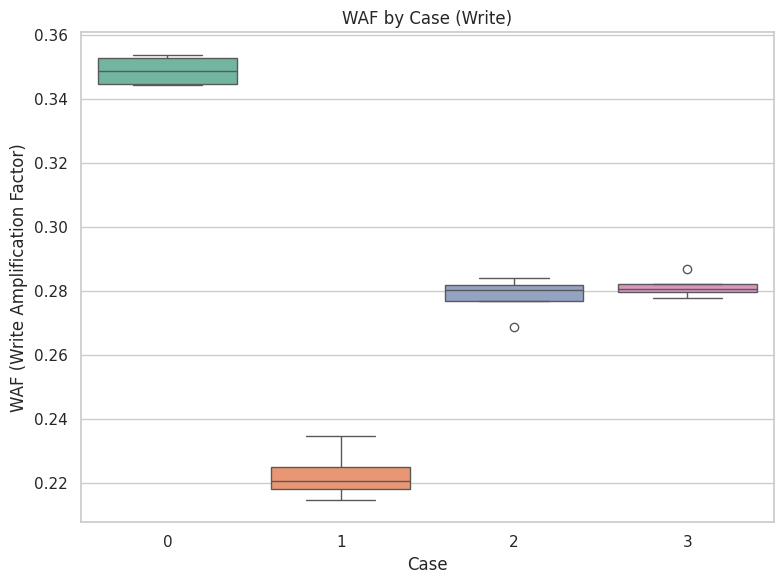

In [6]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_763/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


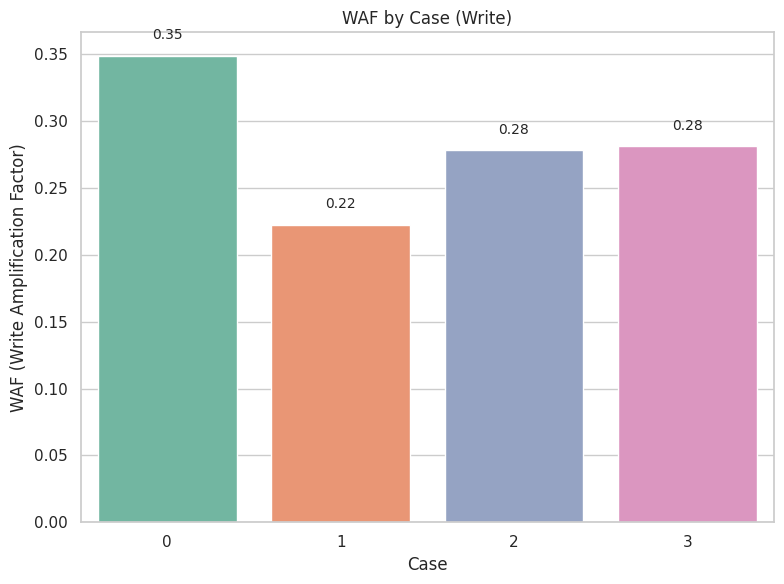

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [8]:
df_write.groupby('case')['WAF'].describe()

/tmp/ipykernel_763/3529477492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['WAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,4.0,0.348986,0.004953,0.344511,0.344826,0.348784,0.352944,0.353866
1,4.0,0.222579,0.008534,0.214685,0.218033,0.220527,0.225073,0.234576
2,4.0,0.278432,0.006659,0.268829,0.276948,0.280414,0.281898,0.284071
3,4.0,0.281355,0.003865,0.277658,0.279715,0.280482,0.282121,0.286797


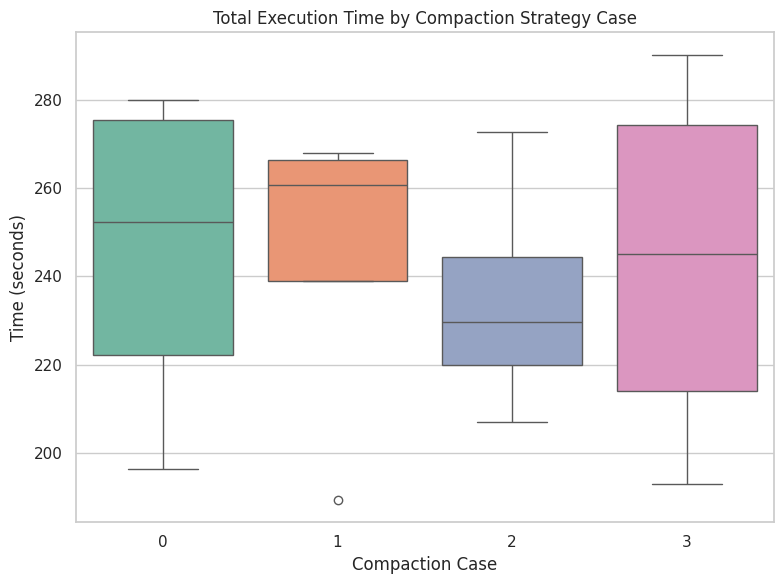

In [9]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_763/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


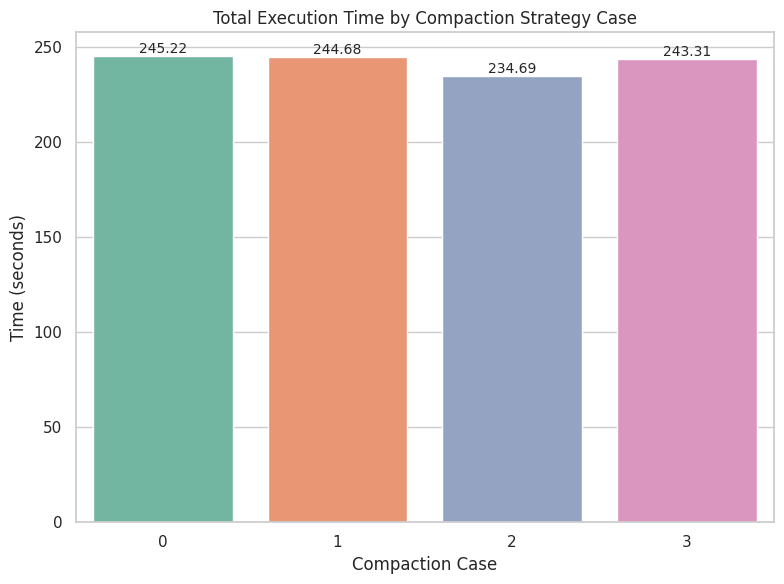

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [11]:
df_write.groupby('case')['time(s)'].describe()

/tmp/ipykernel_763/387987792.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['time(s)'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,4.0,245.22500,39.206026,196.439,222.14675,252.3100,275.38825,279.841
1,4.0,244.67750,37.253941,189.381,239.04075,260.7430,266.37975,267.843
2,4.0,234.69325,27.766365,207.012,219.89475,229.5850,244.38350,272.591
3,4.0,243.30625,44.230720,193.056,214.10100,244.9855,274.19075,290.198


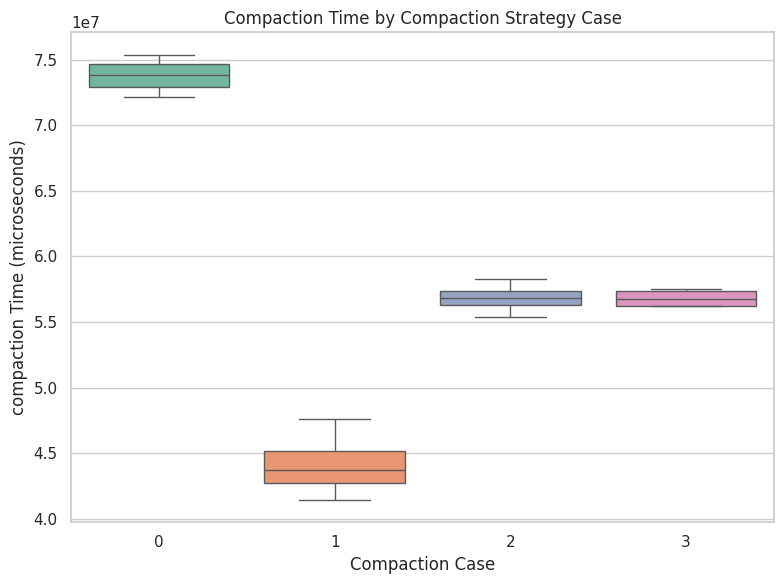

In [13]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_763/1693509766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')


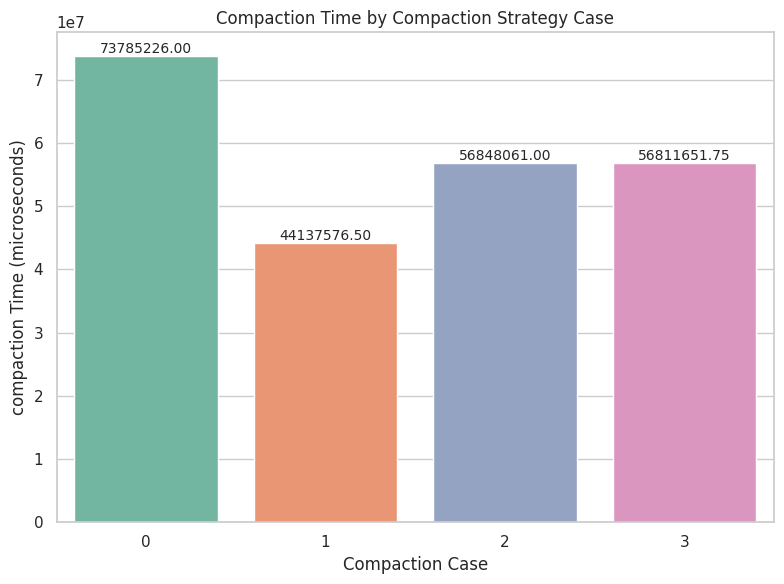

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

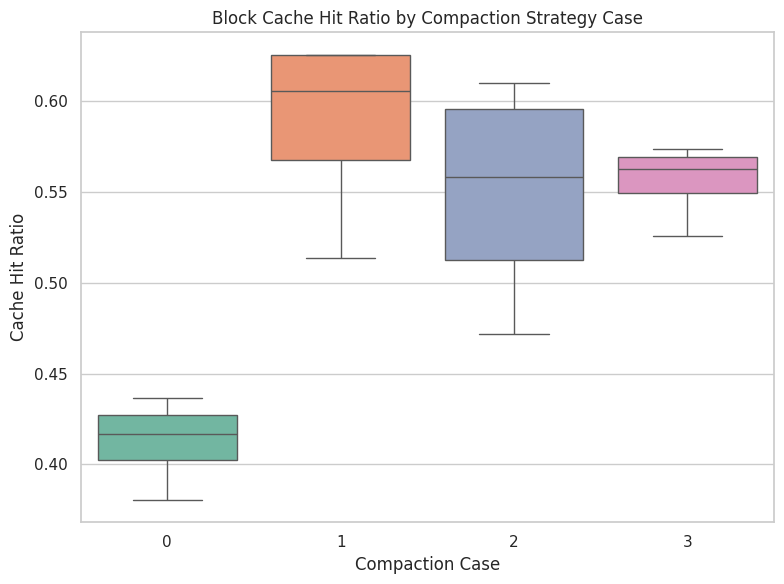

In [13]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1409/1251849913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_write_avg, palette='Set2')


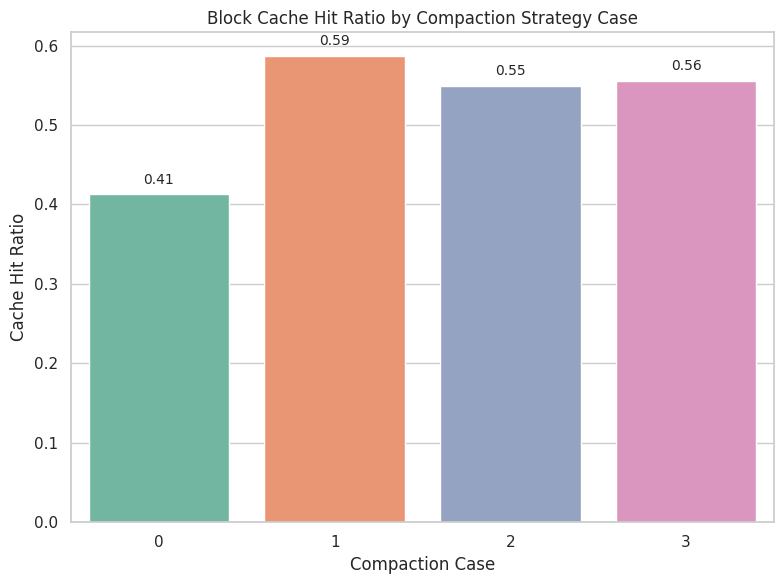

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [15]:
df_write.groupby('case')['cache_hit_ratio'].describe()

/tmp/ipykernel_1409/2399396083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['cache_hit_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,4.0,0.412578,0.024098,0.380490,0.402215,0.416603,0.426966,0.436618
1,4.0,0.587291,0.052514,0.513707,0.567413,0.605074,0.624951,0.625309
2,4.0,0.549468,0.062958,0.471966,0.512213,0.558126,0.595381,0.609654
3,4.0,0.555877,0.021263,0.525515,0.549456,0.562387,0.568808,0.573219


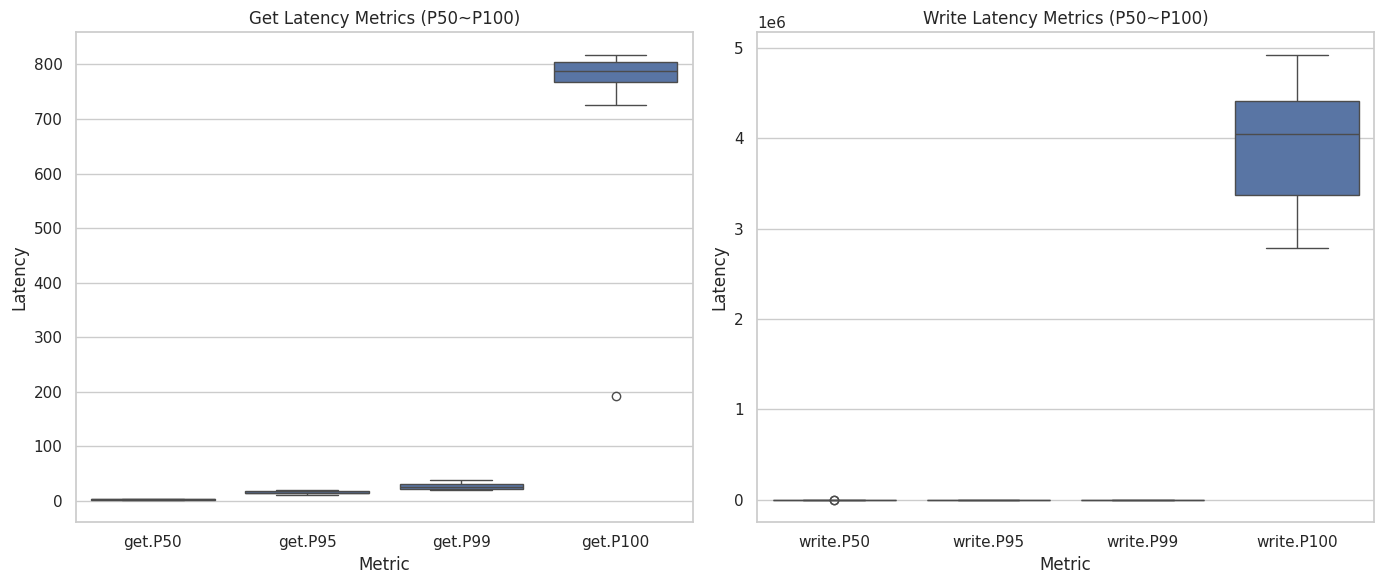

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 설정
get_metrics = ['get.P50', 'get.P95', 'get.P99', 'get.P100']
write_metrics = ['write.P50', 'write.P95', 'write.P99', 'write.P100']

# Melt for seaborn
get_melted = df_write.melt(id_vars=['case'], value_vars=get_metrics, var_name='Metric', value_name='Latency')
write_melted = df_write.melt(id_vars=['case'], value_vars=write_metrics, var_name='Metric', value_name='Latency')

# 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=get_melted, x='Metric', y='Latency')
plt.title('Get Latency Metrics (P50~P100)')

plt.subplot(1, 2, 2)
sns.boxplot(data=write_melted, x='Metric', y='Latency')
plt.title('Write Latency Metrics (P50~P100)')
plt.tight_layout()
plt.show()


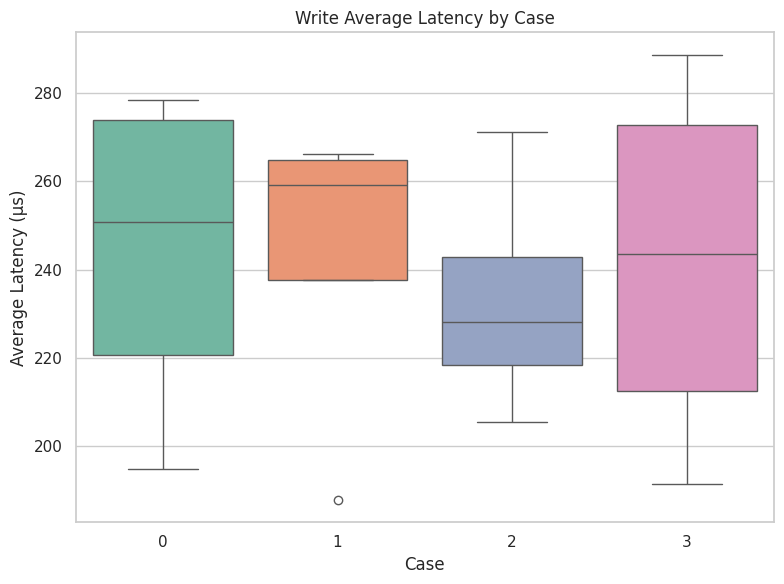

In [17]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1409/2588844532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


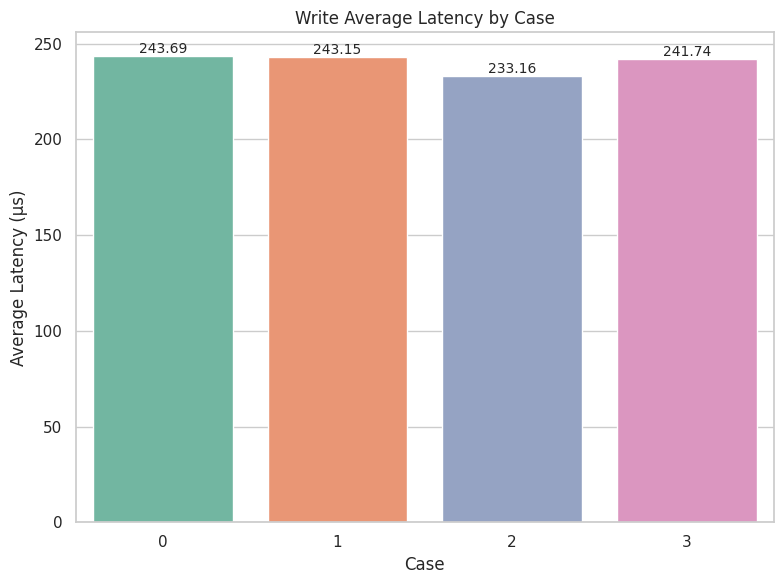

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

In [19]:
df_write.groupby('case')['write.AVG'].describe()

/tmp/ipykernel_1409/3094318407.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_write.groupby('case')['write.AVG'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,4.0,243.688093,39.197744,194.959431,220.573052,250.701213,273.816255,278.390515
1,4.0,243.147660,37.260314,187.837124,237.526256,259.247198,264.868602,266.259121
2,4.0,233.158053,27.791875,205.403609,218.334056,228.086814,242.910812,271.054977
3,4.0,241.740430,44.265838,191.435368,212.519608,243.438049,272.658871,288.650252


/tmp/ipykernel_1409/703605968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.SUM', data=df_write_avg, palette='Set2')


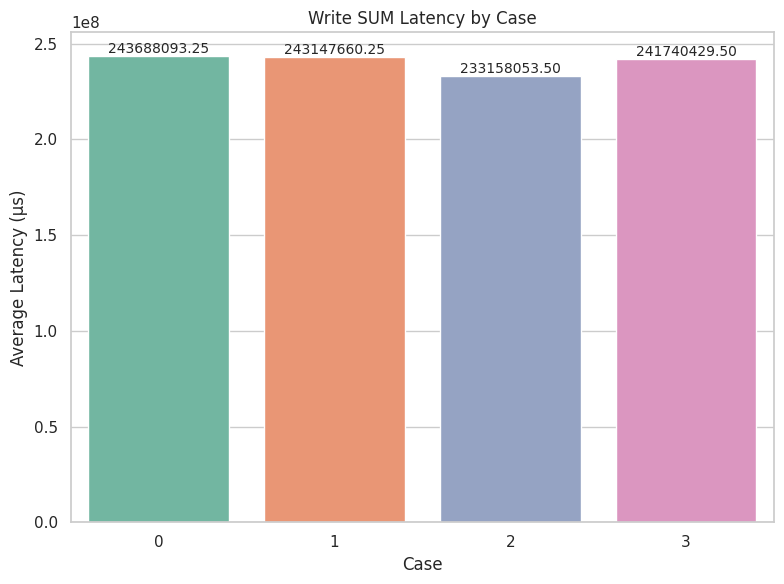

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.SUM', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write SUM Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

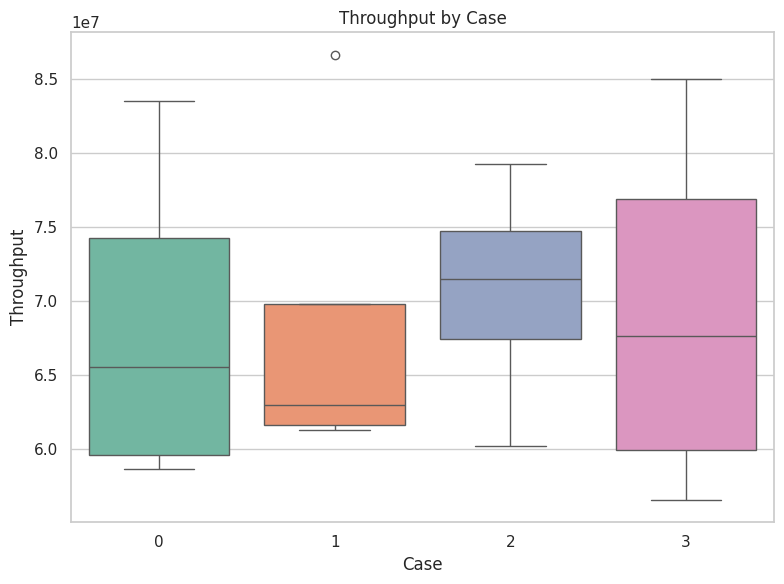

In [21]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1409/3585659375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')


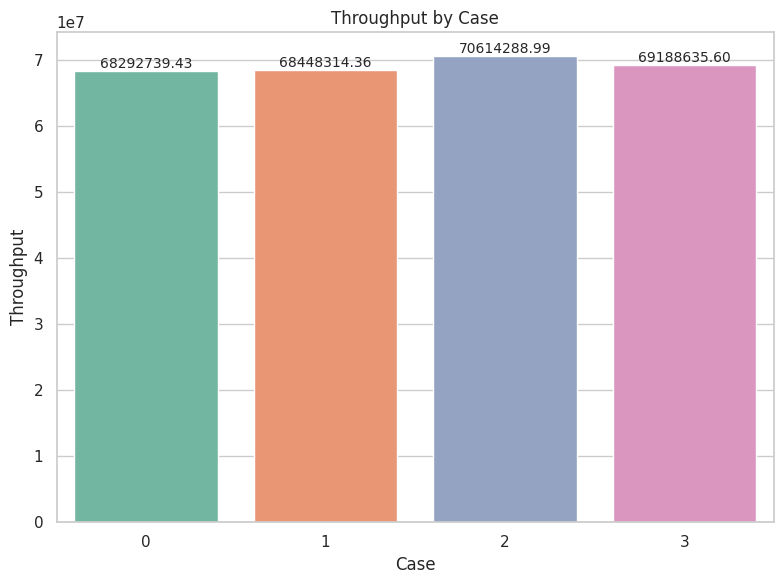

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

## READ

/tmp/ipykernel_1409/3602286828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


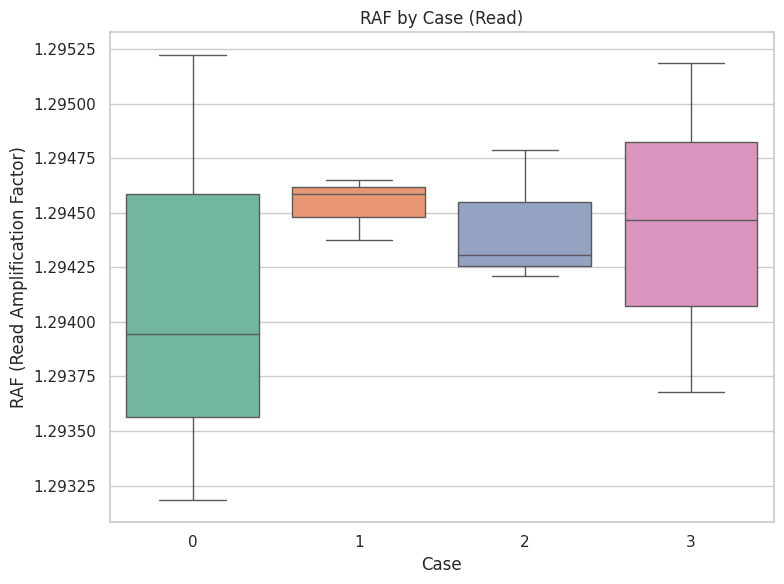

In [23]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1409/2467909650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


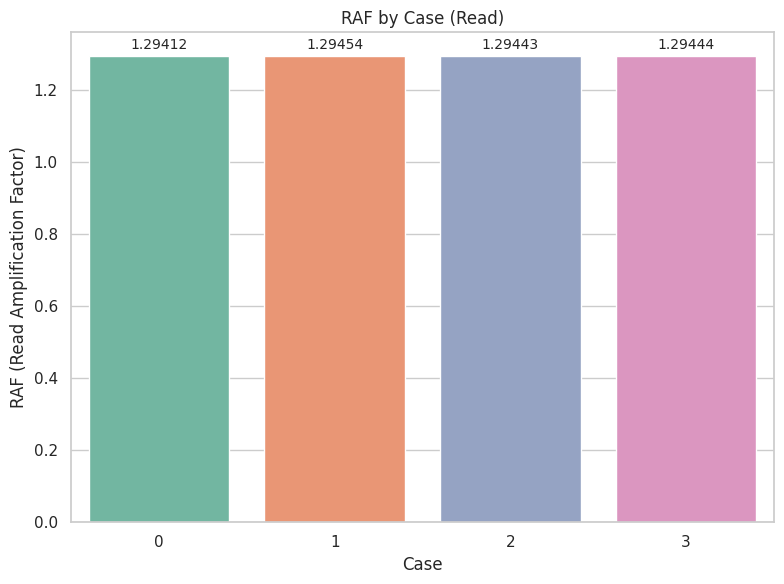

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

In [27]:
df_read.groupby('case')['RAF'].describe()

/tmp/ipykernel_1409/4279424896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_read.groupby('case')['RAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,1.294118,0.001031,1.293184,1.293565,1.293946,1.294585,1.295224
1,3.0,1.294536,0.000144,1.294374,1.294479,1.294584,1.294617,1.294651
2,3.0,1.294435,0.000310,1.294209,1.294258,1.294307,1.294548,1.294788
3,3.0,1.294443,0.000753,1.293679,1.294072,1.294465,1.294824,1.295184


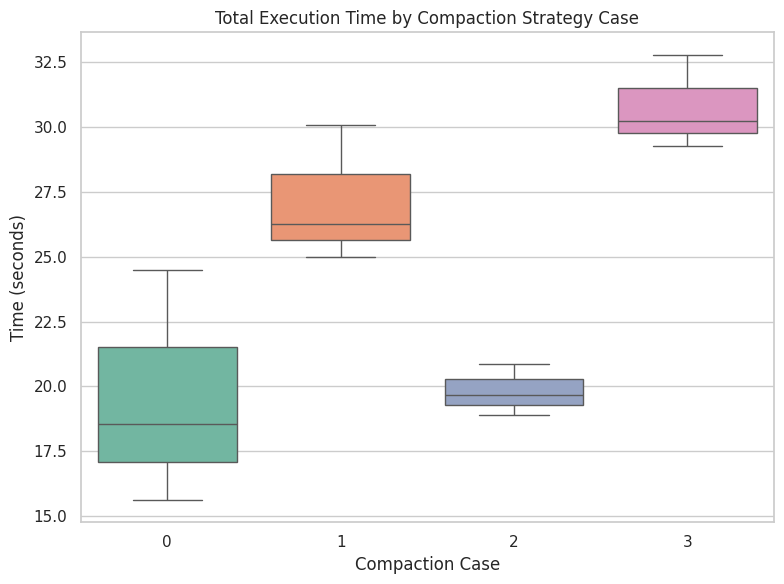

In [26]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_787/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


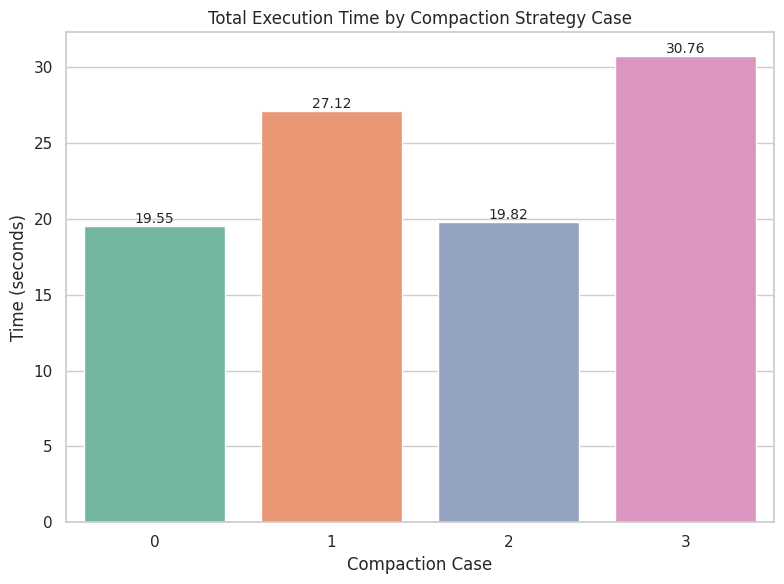

In [70]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

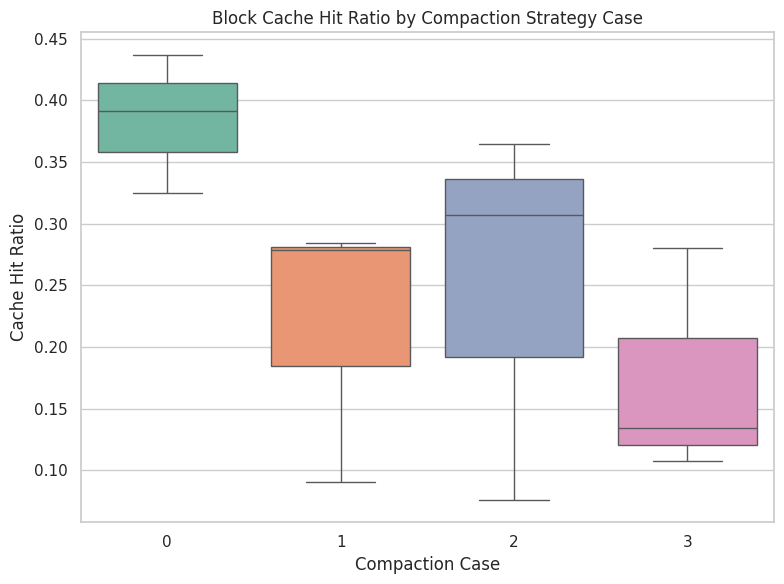

In [71]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_787/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


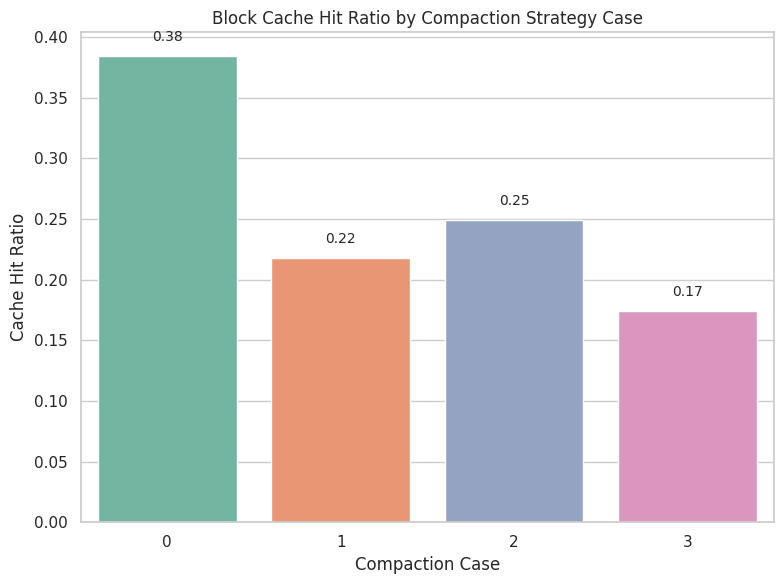

In [74]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [75]:
df_read.groupby('case')[['RAF', 'get.AVG']].mean(numeric_only=True)

/tmp/ipykernel_787/2556910562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_read.groupby('case')[['RAF', 'get.AVG']].mean(numeric_only=True)


,RAF,get.AVG
case,,
0,1.294118,18.297487
1,1.294536,25.932217
2,1.294435,18.604181
3,1.294443,29.542336


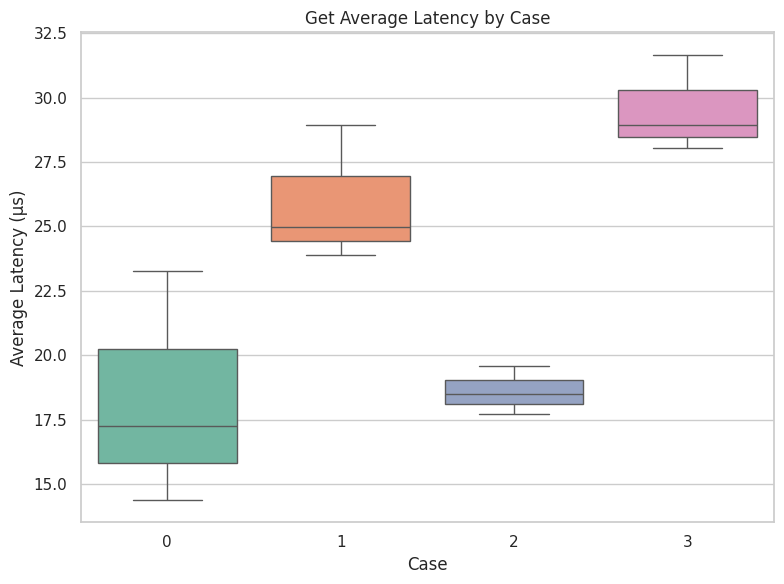

In [33]:
# Block Cache Hit Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_787/2039202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


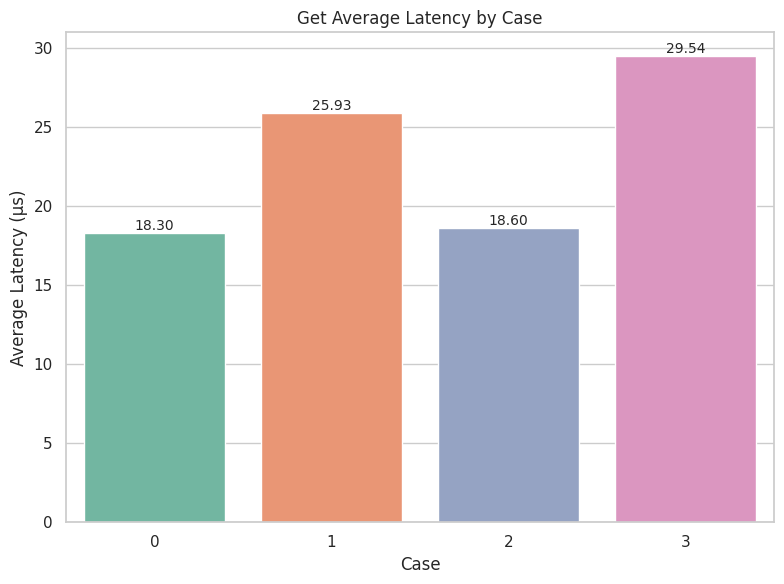

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_787/3055362037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.SUM', data=df_read_avg, palette='Set2')


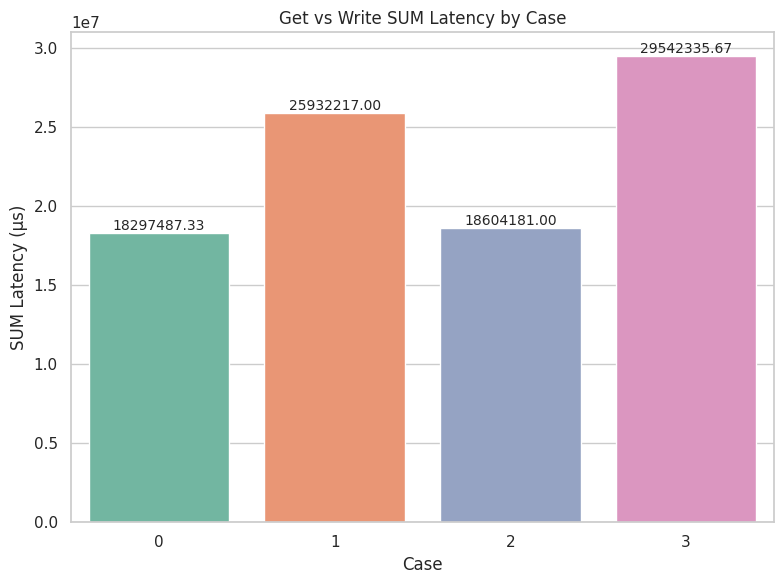

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.SUM', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get vs Write SUM Latency by Case')
plt.ylabel('SUM Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()